# [이것이 데이터 분석이다] week2
### [Chapter01_데이터에서 인사이트 발견하기]
#### 스터디 22.04.04(월)

-----

* raw data : 아직 분석에 활용된 적이 없는 혹은 정제되지 않은 데이터

---
* 탐색적 데이터 분석
    1. 데이터의 출처와 주제에 대한 이해 : 어디에서, 어떻게\
데이터의 이름, 구성 요소, 데이터의 출처와 주제 조사

    2. 데이터의 크기 : 대략적인 양과 개수\
데이터의 크기에 따라서 샘플링의 종류가 달라짐, 데이터 처리 방식도 달라짐
> 샘플링(sampling) : 자료로부터 일부의 값을 추출하는 행위, 분석하고자 하는 데이터가 너무 크거나\
전체 데이터를 사용할 수 없는 경우에 샘플링된 데이터를 분석

    3. 데이터의 구성 요소(피쳐) 
> feature : 데이터를 구성하는 요소

---
* 데이터 속성 탐색
    1. 피처의 속성 탐색 : **데이터에 질문** \
    ex. 우리 반의 평균 키는 몇이나 될까?
    
    2. 피처 간의 상관 관계 탐색 : 피처가 서로에게 미치는 영향력 분석 

---
* 탐색한 데이터의 시각화
: 수치적 자료로만 가지고는 파악하기 힘든 **패턴, 인사이트**를 발견하는데 유용

-----

##### [멕시코풍 프랜차이즈 chipotle의 주문 데이터 분석하기]

In [2]:
import pandas as pd
chipo=pd.read_csv('chipotle.tsv',sep='\t')
print(chipo.shape) # 데이터의 행,열의 크기
print("--------------------")
print(chipo.info()) # 행의 구성 정보와 열의 구성 정보 

(4622, 5)
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


데이터셋의 정보를 보면 \
4622개의 행과 5개의 피처로 구분되어 있음을 알 수 있고\
피처 order_id, quantity는 int64 type\
피처 item_name, choice_description, item_price는 object type(문자열)\
피처 choice_description의 Non-null count를 보면 3376이라고 되어 있다\
기존 데이터가 총 4622개이므로 1246개의 결측값이 존재함을 알 수 있다.

In [3]:
print(chipo.columns)
print('-----------------')
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
-----------------
RangeIndex(start=0, stop=4622, step=1)


* order_id : 주문 번호
* quantity : 주문 수량
* item_name : 아이템 이름
* choice_description : 주문한 아이템의 옵션
* item_price : 주문 아이템의 가격 정보

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [5]:
# order_id -> 'str' 변환
chipo['order_id']=chipo['order_id'].astype(str)
# decribe() 함수는 피처의 기초 통계량을 보여줌
# 현재 유일한 수치형 피처가 'quantity' 피처이브로 'quantity' 피처의 기초 통계량만 제공
print(chipo.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


평균 주문수량은 1.07 임을 알 수 있고 이는 한 사람이 같은 메뉴를 여러 개 구매하는 경우는 많지 않음을 보여줌

In [6]:
# order_id, item_name은 범주형 피처이므로 unique()함수를 통해 피처 내에 몇 개의 범주가 있는지 확인 가능
print(len(chipo['order_id'].unique()))
print(len(chipo['item_name'].unique()))

1834
50


[가장 많이 주문한 아이템 TOP 10]\
DataFrame['column']의 형태에 value_counts() 함수 사용\
DataFrame['column']은 시리즈(series)객체 반환\
value_counts() 함수는 오로지 시리즈 객체에만 적용

In [17]:
item_count=chipo['item_name'].value_counts()[:10]
for idx, (val,cnt) in enumerate(item_count.iteritems(),1):
    print("TOP", idx, ":",val,cnt)

TOP 1 : Chicken Bowl 726
TOP 2 : Chicken Burrito 553
TOP 3 : Chips and Guacamole 479
TOP 4 : Steak Burrito 368
TOP 5 : Canned Soft Drink 301
TOP 6 : Steak Bowl 211
TOP 7 : Chips 211
TOP 8 : Bottled Water 162
TOP 9 : Chicken Soft Tacos 115
TOP 10 : Chips and Fresh Tomato Salsa 110


[아이템별 주문 개수와 총량]\
groupby() 함수를 이용하여 아이템별 주문 개수와 총량을 구할 수 있음

In [23]:
order_count=chipo.groupby('item_name')['order_id'].count()
# 'item_name'을 그룹으로 'order_id' 피처를 count()한 것
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [25]:
item_quantity=chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

[시각화]

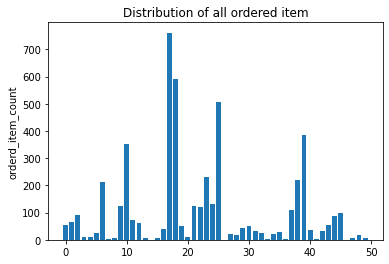

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list=item_quantity.index.tolist()
x_pos=np.arange(len(item_name_list))
order_cnt=item_quantity.values.tolist()

plt.bar(x_pos,order_cnt,align='center')
plt.ylabel('orderd_item_count')
plt.title('Distribution of all ordered item')

plt.show()

[데이터 전처리 : 전처리 함수 사용하기]

In [28]:
print(chipo.info())
print('---')
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
---


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [29]:
# 'item_price'에 '$'기호가 붙어 있어 이를 제거할 필요가 있음
chipo['item_price']=chipo['item_price'].apply(lambda x:float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


[탐색적 분석 : 스무고개로 개념적 탐색 분석하기]

In [34]:
# 주문당 평균 계산금액
chipo.groupby('order_id')['item_price'].sum().mean()
# order_id별로 item_price가 더해지고 이를 평균내는 과정

18.811428571428568

한 사람 당 약 18달러의 주문을 할 것

In [36]:
# 한 주문에 10달러 이상 지불한 id출력하기 
chipo_orderid_group=chipo.groupby('order_id').sum()
print(chipo_orderid_group)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
...            ...         ...
995              3       24.95
996              4       43.00
997              2       22.50
998              2       10.88
999              5       29.25

[1834 rows x 2 columns]


In [43]:
results=chipo_orderid_group[chipo_orderid_group.item_price>=10]
print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


[각 아이템의 가격 구하기]
1. chipo[chipo.quantity==1]으로 동일 아이템을 1개만 구매한 주문을 선별
2. item_name을 기준으로 groupby 연산을 수행한 뒤, min() 함수로 각 그룹별 최저가를 계산
3. item_price를 기준으로 정렬하는 sort_values() 함수를 적용, sort_values는 series 데이터를 정렬해줌


In [46]:
chipo_one_item=chipo[chipo.quantity==1]
price_per_item=chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by='item_price',ascending=False)[:10]


,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


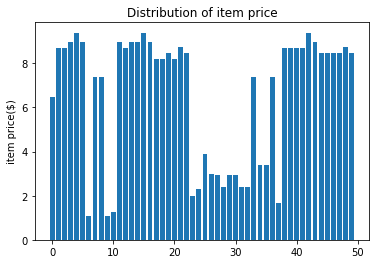

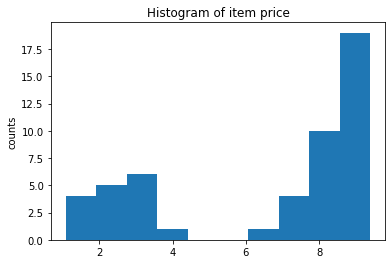

In [50]:
item_name_list=price_per_item.index.tolist()
x_pos=np.arange(len(item_name_list))
item_price=price_per_item['item_price'].tolist()
plt.bar(x_pos,item_price,align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
plt.show()

plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')
plt.show()

[가장 비싼 주문에서 아이템이 총 몇 개 팔렸는지 구하기]


In [52]:
chipo.groupby('order_id').sum().sort_values(by='item_price',ascending=False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


[Veggie salad bowl이 몇 번 주문되었는지 구하기]

In [54]:
chipo_salad=chipo[chipo['item_name']=='Veggie Salad Bowl']
chipo_salad=chipo_salad.drop_duplicates(['item_name','order_id']) # 중복 집계된 item_name제거 
print(len(chipo_salad))
chipo_salad.head(5)

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


['Chicken Bowl'을 2개 이상 주문한 고객들의 'Chicken Bowl' 메뉴에 대한 총 주문 수량 구하기]

In [55]:
chipo_chicken=chipo[chipo['item_name']=='Chicken Bowl']
chipo_chicken_ordersum=chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_result=chipo_chicken_ordersum[chipo_chicken_ordersum>=2]
print(len(chipo_chicken_result))
chipo_chicken_result.head(5)

114


order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64